## New Orleans Crime Stats for 2020
---
## Starter Code to Import Libraries and Load Crime Statistics

The dataset is for all of the Police Reports filed by NOPD officers including incident and supplemental reports containing the item number, location, disposition, signal, charges, offender race, offender gender, offender age, victim age, victim gender, and victim race for the year 2020.


In [1]:
# Dependencies and Setup
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the csv into a Pandas Data Frame
crime_2020 = pd.read_csv("Resources/police2020.csv")

# Examine the data frame
crime_2020.head()


,Item_Number,Year,District,Location,Disposition,Signal_Type,Signal_Description,Occurred_Date_Time,Charge_Code,Charge_Description,...,Offender_Gender,Offender_Age,Victim_Number,PersonType,Victim_Race,Victim_Gender,Victim_Age,Victim_Fatal_Status,Hate Crime,Report Type
0,A-07857-20,2020,7,13911 CURRAN RD,OPEN,43B,SEXUAL BATTERY,1/7/20 10:25,NaN,NaN,...,NaN,NaN,1.0,VICTIM,NaN,NaN,5.0,Non-fatal,NaN,Incident Report
1,A-08308-21,2020,1,3624 CLEVELAND AV,OPEN,67,THEFT,12/17/20 12:00,14 67,THEFT,...,NaN,NaN,1.0,VICTIM,WHITE,FEMALE,21.0,Non-fatal,NaN,Incident Report
2,A-08600-20,2020,2,6050 MAGAZINE,OPEN,67S,SHOPLIFTING,1/7/20 23:04,NaN,NaN,...,MALE,NaN,2.0,WITNESS,BLACK,FEMALE,42.0,Non-fatal,NaN,Incident Report
3,A-09822-21,2020,5,1719 FRANCE ST,OPEN,67,THEFT,12/30/20 22:30,NaN,NaN,...,NaN,NaN,1.0,VICTIM,BLACK,MALE,28.0,Non-fatal,NaN,Incident Report
4,A-10622-20,2020,2,5100 LA SALLE ST,OPEN,67,THEFT,1/8/20 15:40,14 67,THEFT,...,MALE,18.0,1.0,VICTIM,BLACK,MALE,16.0,Non-fatal,NaN,Incident Report


In [3]:
# Examine the data types within the dataset
crime_2020.dtypes

Item_Number             object
Year                     int64
District                 int64
Location                object
Disposition             object
Signal_Type             object
Signal_Description      object
Occurred_Date_Time      object
Charge_Code             object
Charge_Description      object
Offender_Number        float64
OffenderID             float64
OffenderStatus          object
Offender_Race           object
Offender_Gender         object
Offender_Age           float64
Victim_Number          float64
PersonType              object
Victim_Race             object
Victim_Gender           object
Victim_Age             float64
Victim_Fatal_Status     object
Hate Crime              object
Report Type             object
dtype: object

In [4]:
len(crime_2020.index)

102397

In [5]:
# Convert Occurred_Date_Time from integer to date time.
crime_2020['Occurred_Date_Time'] = pd.to_datetime(crime_2020['Occurred_Date_Time'], utc=True)
crime_2020['Occurred_Date_Time'].dt.date

0         2020-01-07
1         2020-12-17
2         2020-01-07
3         2020-12-30
4         2020-01-08
             ...    
102392    2020-12-04
102393    2020-10-12
102394    2020-11-08
102395    2020-12-03
102396    2020-12-03
Name: Occurred_Date_Time, Length: 102397, dtype: object

In [6]:
# This code replaces the date/time in Occurred_Date_Time column with only the date.
crime_2020["Occurred_Date_Time"] = crime_2020["Occurred_Date_Time"].dt.date
print(crime_2020)

       Item_Number  Year  District                 Location Disposition  \
0       A-07857-20  2020         7          13911 CURRAN RD        OPEN   
1       A-08308-21  2020         1        3624 CLEVELAND AV        OPEN   
2       A-08600-20  2020         2            6050 MAGAZINE        OPEN   
3       A-09822-21  2020         5          1719  FRANCE ST        OPEN   
4       A-10622-20  2020         2         5100 LA SALLE ST        OPEN   
...            ...   ...       ...                      ...         ...   
102392  X-00029-20  2020         5   1100 ELYSIAN FIELDS AV        OPEN   
102393  X-00030-20  2020         4             2351 BEHRMAN        OPEN   
102394  X-00031-20  2020         1     2700 SAINT PHILIP ST        OPEN   
102395  X-00032-20  2020         2  1119 BORDEAUX ST #70115        OPEN   
102396  X-00033-20  2020         3          5906 MARIGNY ST        OPEN   

       Signal_Type      Signal_Description Occurred_Date_Time Charge_Code  \
0              43B    

In [7]:
# This views the data and conducts column counts.
crime_2020.count()

Item_Number            102397
Year                   102397
District               102397
Location               102397
Disposition            102397
Signal_Type            102397
Signal_Description     102397
Occurred_Date_Time     102397
Charge_Code             46458
Charge_Description      46458
Offender_Number         63982
OffenderID              63982
OffenderStatus          19514
Offender_Race           43615
Offender_Gender         41466
Offender_Age            26744
Victim_Number          100841
PersonType             100841
Victim_Race             84100
Victim_Gender           84267
Victim_Age              79164
Victim_Fatal_Status    102397
Hate Crime                 26
Report Type            102397
dtype: int64

In [8]:
# Drop the duplicates and keep the first value, use inplace True
deduped_crime = crime_2020.drop_duplicates(subset=["Item_Number"], keep="first", inplace=False)
#deduped_crime = crime_2020
deduped_crime

,Item_Number,Year,District,Location,Disposition,Signal_Type,Signal_Description,Occurred_Date_Time,Charge_Code,Charge_Description,...,Offender_Gender,Offender_Age,Victim_Number,PersonType,Victim_Race,Victim_Gender,Victim_Age,Victim_Fatal_Status,Hate Crime,Report Type
0,A-07857-20,2020,7,13911 CURRAN RD,OPEN,43B,SEXUAL BATTERY,2020-01-07,NaN,NaN,...,NaN,NaN,1.0,VICTIM,NaN,NaN,5.0,Non-fatal,NaN,Incident Report
1,A-08308-21,2020,1,3624 CLEVELAND AV,OPEN,67,THEFT,2020-12-17,14 67,THEFT,...,NaN,NaN,1.0,VICTIM,WHITE,FEMALE,21.0,Non-fatal,NaN,Incident Report
2,A-08600-20,2020,2,6050 MAGAZINE,OPEN,67S,SHOPLIFTING,2020-01-07,NaN,NaN,...,MALE,NaN,2.0,WITNESS,BLACK,FEMALE,42.0,Non-fatal,NaN,Incident Report
3,A-09822-21,2020,5,1719 FRANCE ST,OPEN,67,THEFT,2020-12-30,NaN,NaN,...,NaN,NaN,1.0,VICTIM,BLACK,MALE,28.0,Non-fatal,NaN,Incident Report
4,A-10622-20,2020,2,5100 LA SALLE ST,OPEN,67,THEFT,2020-01-08,14 67,THEFT,...,MALE,18.0,1.0,VICTIM,BLACK,MALE,16.0,Non-fatal,NaN,Incident Report
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102391,X-00029-20,2020,5,1100 ELYSIAN FIELDS AV,OPEN,67S,SHOPLIFTING,2020-12-04,14 67,THEFT,...,MALE,NaN,1.0,VICTIM,NaN,NaN,NaN,Non-fatal,NaN,Incident Report
102393,X-00030-20,2020,4,2351 BEHRMAN,OPEN,21P,LOST PROPERTY,2020-10-12,NaN,NaN,...,NaN,NaN,1.0,REPORTING PERSON,WHITE,FEMALE,48.0,Non-fatal,NaN,Incident Report
102394,X-00031-20,2020,1,2700 SAINT PHILIP ST,OPEN,56,SIMPLE CRIMINAL DAMAGE,2020-11-08,14 56,SIMPLE CRIMINAL DAMAGE TO PROPERTY,...,NaN,NaN,1.0,VICTIM,WHITE,MALE,64.0,Non-fatal,NaN,Incident Report
102395,X-00032-20,2020,2,1119 BORDEAUX ST #70115,OPEN,56,SIMPLE CRIMINAL DAMAGE,2020-12-03,NaN,NaN,...,MALE,NaN,1.0,VICTIM,WHITE,FEMALE,32.0,Non-fatal,NaN,Incident Report


In [9]:
# This drops duplicates from Item_Number, then stores the changes.
#crime_2020.drop_duplicates(keep=False, ignore_index=True, inplace=True)
#deduped_crime = crime_2020
deduped_crime.count()

Item_Number            58238
Year                   58238
District               58238
Location               58238
Disposition            58238
Signal_Type            58238
Signal_Description     58238
Occurred_Date_Time     58238
Charge_Code            27139
Charge_Description     27139
Offender_Number        33745
OffenderID             33745
OffenderStatus          9070
Offender_Race          20596
Offender_Gender        19144
Offender_Age           12990
Victim_Number          56708
PersonType             56708
Victim_Race            48163
Victim_Gender          48259
Victim_Age             45727
Victim_Fatal_Status    58238
Hate Crime                15
Report Type            58238
dtype: int64

In [10]:
# Remove Miscellaneous Incident from the Signal_Description column
clean_signal =deduped_crime.loc[~deduped_crime["Signal_Description"].str.contains("MISCELLANEOUS INCIDENT")]
clean_signal.head()

,Item_Number,Year,District,Location,Disposition,Signal_Type,Signal_Description,Occurred_Date_Time,Charge_Code,Charge_Description,...,Offender_Gender,Offender_Age,Victim_Number,PersonType,Victim_Race,Victim_Gender,Victim_Age,Victim_Fatal_Status,Hate Crime,Report Type
0,A-07857-20,2020,7,13911 CURRAN RD,OPEN,43B,SEXUAL BATTERY,2020-01-07,NaN,NaN,...,NaN,NaN,1.0,VICTIM,NaN,NaN,5.0,Non-fatal,NaN,Incident Report
1,A-08308-21,2020,1,3624 CLEVELAND AV,OPEN,67,THEFT,2020-12-17,14 67,THEFT,...,NaN,NaN,1.0,VICTIM,WHITE,FEMALE,21.0,Non-fatal,NaN,Incident Report
2,A-08600-20,2020,2,6050 MAGAZINE,OPEN,67S,SHOPLIFTING,2020-01-07,NaN,NaN,...,MALE,NaN,2.0,WITNESS,BLACK,FEMALE,42.0,Non-fatal,NaN,Incident Report
3,A-09822-21,2020,5,1719 FRANCE ST,OPEN,67,THEFT,2020-12-30,NaN,NaN,...,NaN,NaN,1.0,VICTIM,BLACK,MALE,28.0,Non-fatal,NaN,Incident Report
4,A-10622-20,2020,2,5100 LA SALLE ST,OPEN,67,THEFT,2020-01-08,14 67,THEFT,...,MALE,18.0,1.0,VICTIM,BLACK,MALE,16.0,Non-fatal,NaN,Incident Report


In [11]:
# Select columns of interest from the DataFrame and save the new DataFrame
# Selected: "Item_Number", "Year", "District", "Signal_Description", "Occurred_Date_Time", & "Offender_Gender". 

reduced_crime_df = clean_signal[["Item_Number", "Year", "District", "Signal_Type","Signal_Description", "Occurred_Date_Time", 
                       "Offender_Gender", "Victim_Fatal_Status"]]
reduced_crime_df.head()

,Item_Number,Year,District,Signal_Type,Signal_Description,Occurred_Date_Time,Offender_Gender,Victim_Fatal_Status
0,A-07857-20,2020,7,43B,SEXUAL BATTERY,2020-01-07,NaN,Non-fatal
1,A-08308-21,2020,1,67,THEFT,2020-12-17,NaN,Non-fatal
2,A-08600-20,2020,2,67S,SHOPLIFTING,2020-01-07,MALE,Non-fatal
3,A-09822-21,2020,5,67,THEFT,2020-12-30,NaN,Non-fatal
4,A-10622-20,2020,2,67,THEFT,2020-01-08,MALE,Non-fatal


In [12]:
# Count how many incidents occurred
crime_type = reduced_crime_df ["Signal_Description"].value_counts()
crime_type

DISTURBANCE (DOMESTIC)         8922
SIMPLE BURGLARY (VEHICLE)      5024
AUTO THEFT                     3097
SIMPLE BATTERY (DOMESTIC)      2859
DISTURBANCE                    2833
                               ... 
ILLEGAL CARRYING OF A KNIFE       1
WARRANT STOP AND RELEASE          1
CURFEW VIOLATION                  1
HOMICIDE (DOMESTIC)               1
ASSET SEIZURE                     1
Name: Signal_Description, Length: 153, dtype: int64

In [13]:
reduced_crime_df.groupby("Signal_Description").count()

,Item_Number,Year,District,Signal_Type,Occurred_Date_Time,Offender_Gender,Victim_Fatal_Status
Signal_Description,,,,,,,
ABANDONED VEHICLE,33,33,33,33,33,0,33
AGGRAVATED ARSON,8,8,8,8,8,6,8
AGGRAVATED ASSAULT,692,692,692,692,692,559,692
AGGRAVATED ASSAULT (DOMESTIC),298,298,298,298,298,253,298
AGGRAVATED BATTERY,103,103,103,103,103,85,103
...,...,...,...,...,...,...,...
UNCLASSIFIED DEATH,236,236,236,236,236,0,236
UNDERAGE DRINKING,2,2,2,2,2,2,2
VIDEO VOYEURISM,68,68,68,68,68,14,68


In [14]:
# Convert the Signal_Description into a DataFrame and retrieve the top ten offenses.
crime_specific_df = pd.DataFrame(crime_type)
crime_filtered = crime_specific_df.nlargest(10, columns=["Signal_Description"], keep= "all")
# Export the City_Data into a csv
crime_filtered.to_csv("output_data/2020_crime_10.csv")
crime_filtered

,Signal_Description
DISTURBANCE (DOMESTIC),8922
SIMPLE BURGLARY (VEHICLE),5024
AUTO THEFT,3097
SIMPLE BATTERY (DOMESTIC),2859
DISTURBANCE,2833
SIMPLE CRIMINAL DAMAGE,2766
THEFT,2416
SHOPLIFTING,2308
SIMPLE BATTERY,1746
LOST PROPERTY,1602


In [15]:
# Group by Signal_Description
reduced_crime_df.count_column=reduced_crime_df.groupby(["Signal_Description"]).Signal_Description.transform('count')
reduced_crime_df.head()

,Item_Number,Year,District,Signal_Type,Signal_Description,Occurred_Date_Time,Offender_Gender,Victim_Fatal_Status
0,A-07857-20,2020,7,43B,SEXUAL BATTERY,2020-01-07,NaN,Non-fatal
1,A-08308-21,2020,1,67,THEFT,2020-12-17,NaN,Non-fatal
2,A-08600-20,2020,2,67S,SHOPLIFTING,2020-01-07,MALE,Non-fatal
3,A-09822-21,2020,5,67,THEFT,2020-12-30,NaN,Non-fatal
4,A-10622-20,2020,2,67,THEFT,2020-01-08,MALE,Non-fatal


In [16]:
top_10_crimes_20 = (reduced_crime_df["Signal_Description"].value_counts())[:10]
top_10_crimes_20

DISTURBANCE (DOMESTIC)       8922
SIMPLE BURGLARY (VEHICLE)    5024
AUTO THEFT                   3097
SIMPLE BATTERY (DOMESTIC)    2859
DISTURBANCE                  2833
SIMPLE CRIMINAL DAMAGE       2766
THEFT                        2416
SHOPLIFTING                  2308
SIMPLE BATTERY               1746
LOST PROPERTY                1602
Name: Signal_Description, dtype: int64

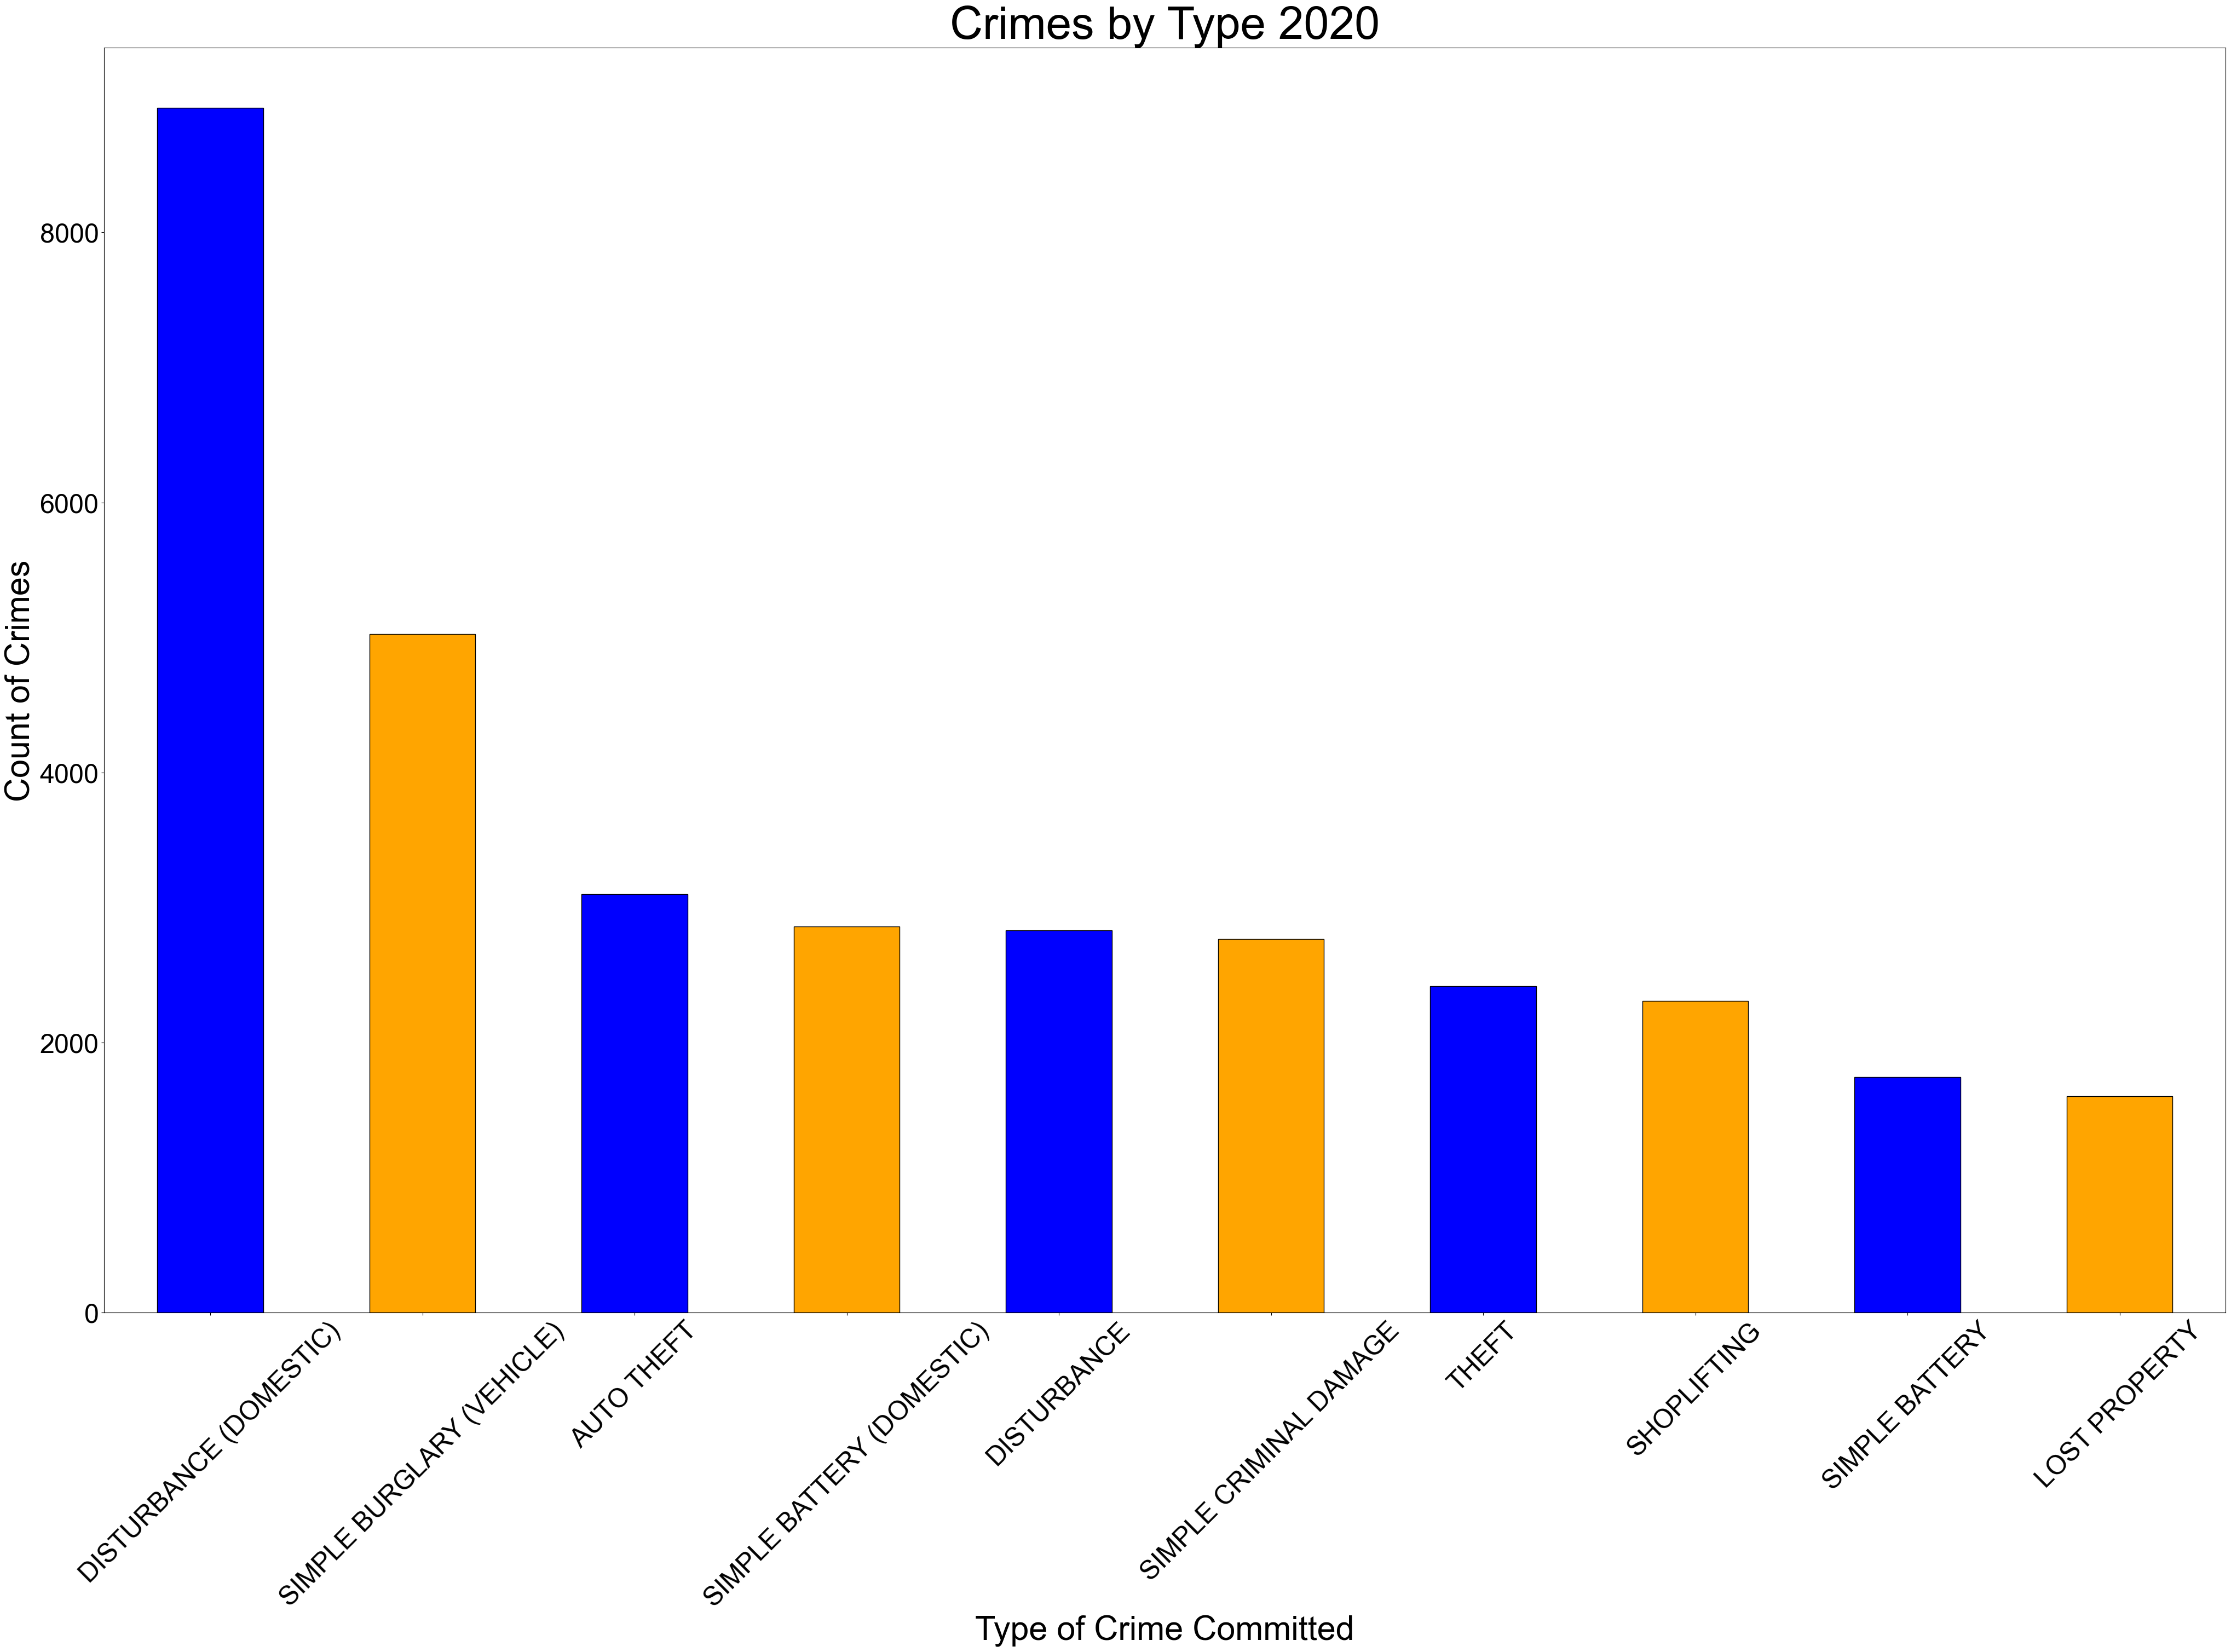

In [17]:
# Create a bar graph representing Signal_Description top ten with Counts
top_10_crimes_20.plot(kind='bar', edgecolor='black', rot=45, fontsize=35, color=["blue","orange"])
sns.set(style = 'darkgrid')
#add axis labels
plt.title("Crimes by Type 2020", fontsize=60)
plt.xlabel('Type of Crime Committed', fontsize=44)
plt.ylabel('Count of Crimes', fontsize=44)
plt.gcf().set_size_inches(50,30)
# Save the figure
plt.savefig("output_data/2020_crime_type.png")

In [18]:
reduced_crime_df.groupby("Signal_Description").count()

,Item_Number,Year,District,Signal_Type,Occurred_Date_Time,Offender_Gender,Victim_Fatal_Status
Signal_Description,,,,,,,
ABANDONED VEHICLE,33,33,33,33,33,0,33
AGGRAVATED ARSON,8,8,8,8,8,6,8
AGGRAVATED ASSAULT,692,692,692,692,692,559,692
AGGRAVATED ASSAULT (DOMESTIC),298,298,298,298,298,253,298
AGGRAVATED BATTERY,103,103,103,103,103,85,103
...,...,...,...,...,...,...,...
UNCLASSIFIED DEATH,236,236,236,236,236,0,236
UNDERAGE DRINKING,2,2,2,2,2,2,2
VIDEO VOYEURISM,68,68,68,68,68,14,68


In [19]:
district_crimes_20 = (reduced_crime_df["District"].value_counts())[:10]
district_crimes_20

7    10020
5     7481
6     6726
3     6673
2     5605
1     5485
4     5290
8     5271
Name: District, dtype: int64

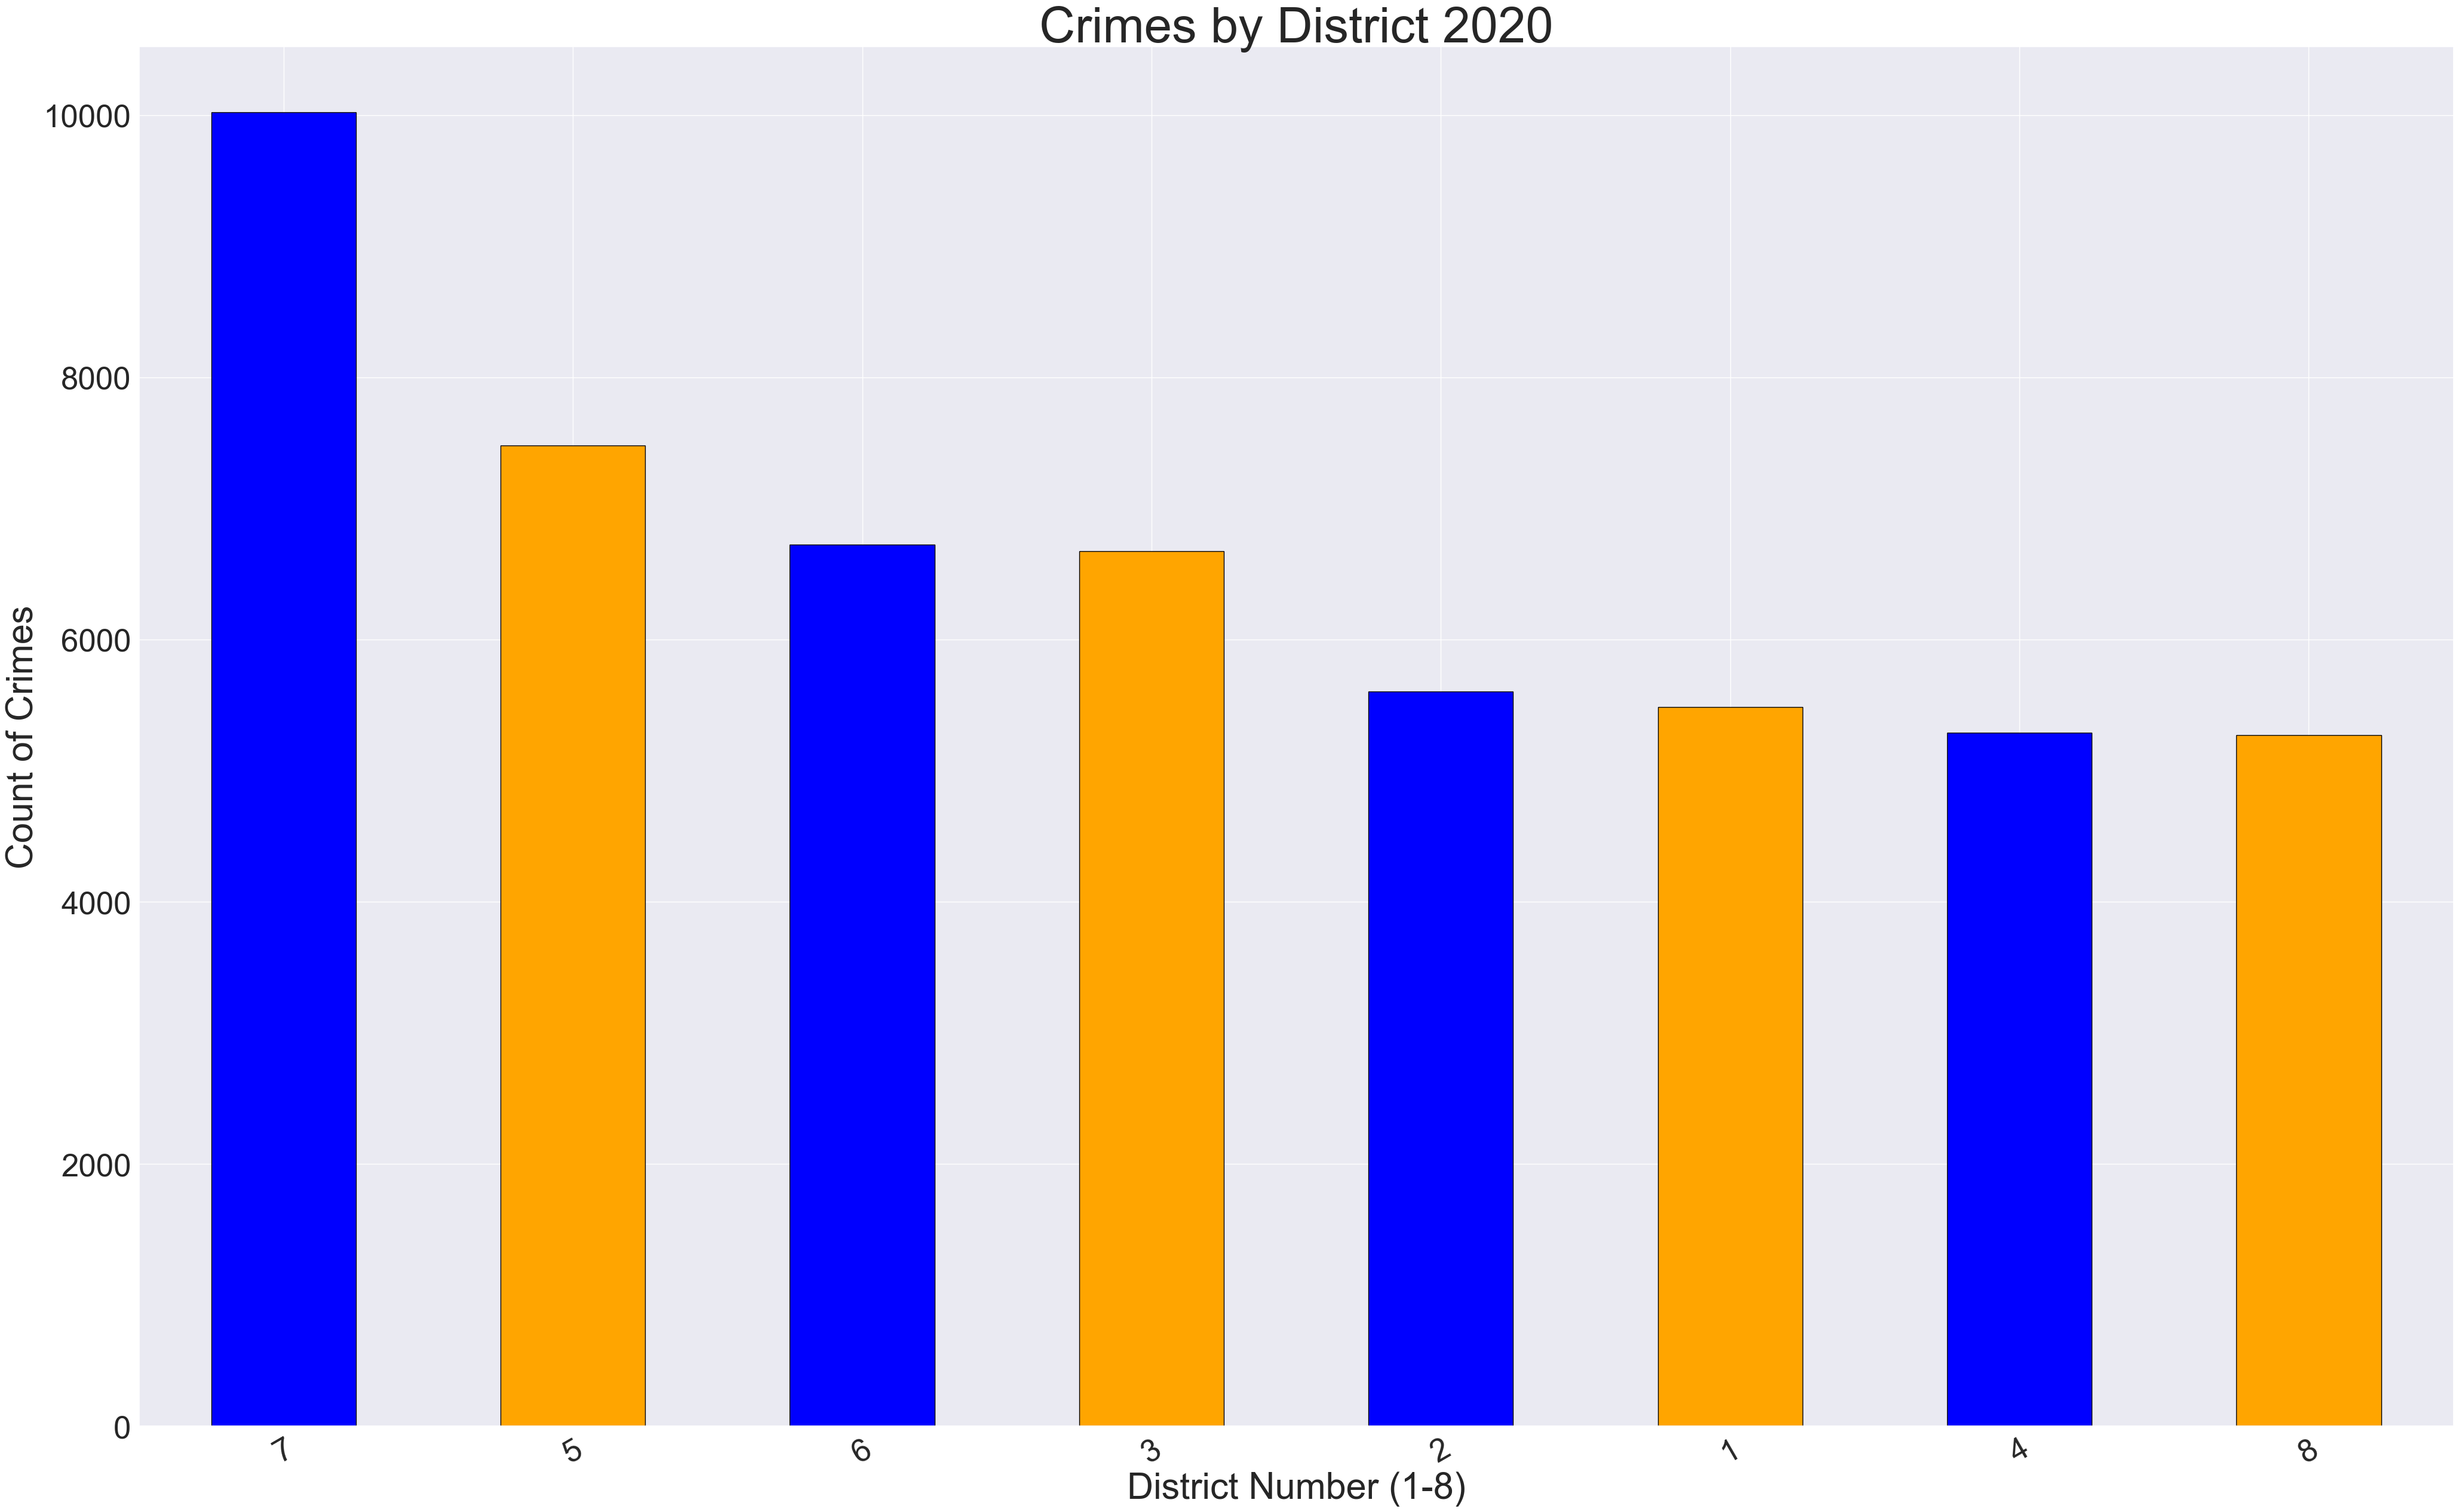

In [20]:
# Create a bar graph representing Signal_Description top ten with Counts
district_crimes_20.plot(kind='bar', edgecolor='black', rot=30, fontsize=38, color=["blue","orange"])
sns.set(style = 'darkgrid')

#add axis labels
plt.title("Crimes by District 2020", fontsize=60)
plt.xlabel('District Number (1-8)', fontsize=44)
plt.ylabel('Count of Crimes', fontsize=44)
plt.gcf().set_size_inches(50,30)
# Save the figure
plt.savefig("output_data/2020_district.png")

In [21]:
#crime_month = (reduced_crime_df["Occurred_Date_Time"].value_counts())[:10]
#crime_month

In [22]:
#fatality = reduced_crime_df["Victim_Fatal_Status"].value_counts()
#fatality

In [23]:
#reduced_crime_df["Offender_Gender"].value_counts().plot.pie(labels=["Male", "Female"], autopct="%.2f")
#plt.title("2018 Crime by Gender", fontsize=20)
# Save the figure
#plt.savefig("output_data/2018_gender.png")

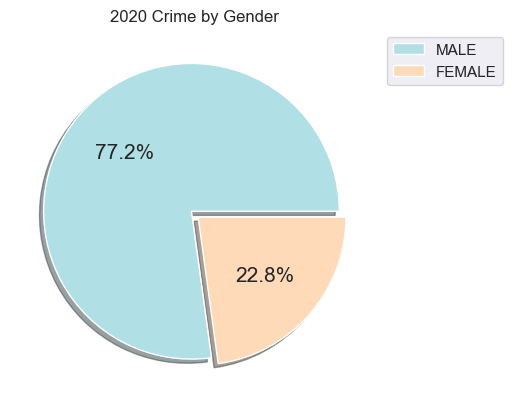

In [24]:
colors = ["#B0E0E6","#FFDAB9", "#B0E0E6","#FFDAB9"]
data = reduced_crime_df["Offender_Gender"].value_counts()
ax = data.plot(kind="pie", autopct='%1.1f%%', shadow=True, explode=[0.03, 0.03], colors=colors, legend=True, title="2020 Crime by Gender", fontsize=15, ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig("output_data/2020_gender.png")
plt.show()

In [266]:
#reduced_crime_df.groupby("District")["Signal_Description"].count().sort_values(ascending=False)
#reduced_crime_df.groupby("Signal_Description")["District"].count().sort_values(ascending=True)
#reduced_crime_df.value_counts()